# **Neural Network Classification(Bonus part)**

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


Load and Preprocess Data

In [ ]:
# Load data
data = pd.read_csv("cleaned_data.csv")

# Encode categorical features
#---------------------------------
#le_location = LabelEncoder()
#le_gender = LabelEncoder()
#le_relationship = LabelEncoder()

#data['Location'] = le_location.fit_transform(data['Location'])
#data['Gender'] = le_gender.fit_transform(data['Gender'])
#data['Relationship_Status'] = le_relationship.fit_transform(data['Relationship_Status'])

# One-hot encode categorical features (safer for nominal variables)
data = pd.get_dummies(data, columns=['Location', 'Gender', 'Relationship_Status'])
#------------------------------------


# Define features and target
X = data.drop(columns=['User_ID', 'Sleep_Quality'])  # exclude user ID and target
y = data['Sleep_Quality']

# Optional: Convert Sleep_Quality into classes (Low:1-3, Medium:4-7, High:8-10)
def categorize_sleep(val):
    if val <= 3:
        return 0  # Low
    elif val <= 7:
        return 1  # Medium
    else:
        return 2  # High

y = y.apply(categorize_sleep)

# Normalize features
scaler = StandardScaler() # StandardScaler normalizes all features to have mean=0 and variance=1
                          # This helps neural networks train more effectively
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (844, 20)
X_test shape: (212, 20)
y_train shape: (844,)
y_test shape: (212,)


Build Neural Network Model

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3152 - loss: 1.5538 - val_accuracy: 0.7219 - val_loss: 0.8692 - learning_rate: 0.0010
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5446 - loss: 0.9601 - val_accuracy: 0.8521 - val_loss: 0.7057 - learning_rate: 0.0010
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6861 - loss: 0.7460 - val_accuracy: 0.8698 - val_loss: 0.6057 - learning_rate: 0.0010
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7464 - loss: 0.6503 - val_accuracy: 0.8935 - val_loss: 0.5244 - learning_rate: 0.0010
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7885 - loss: 0.5431 - val_accuracy: 0.9172 - val_loss: 0.4559 - learning_rate: 0.0010
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8085 - loss: 0.4612 - val_accuracy: 0.9586 - val_loss: 0.3892 - learning_rate: 0.0010
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8665 - loss: 0.3965 - val_accuracy:

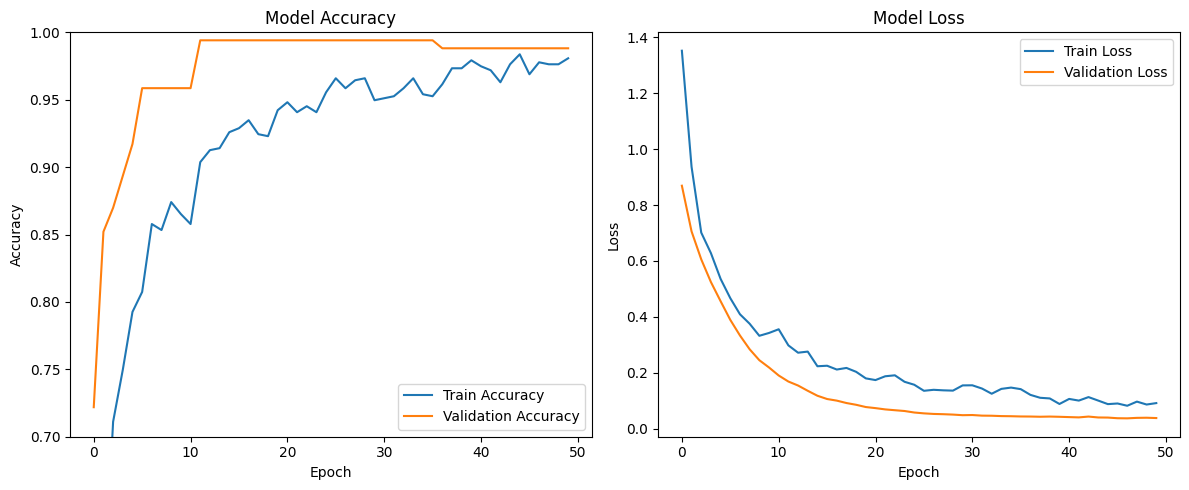

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,139 (16.17 KB)

 Trainable params: 1,347 (5.26 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 2,696 (10.54 KB)

None


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model with regularization
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes for sleep quality
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5
)

# Train the model (only once!)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,  # Adjusted for stability
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Plotting
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Adjust based on your data
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
print(model.summary())

Evaluate the Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9889 - loss: 0.0530 
Test Accuracy: 0.9858
Test Loss: 0.0588


Visualize Performance (Confusion Matrix)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        65
           1       0.99      0.98      0.98        89
           2       1.00      1.00      1.00        58

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



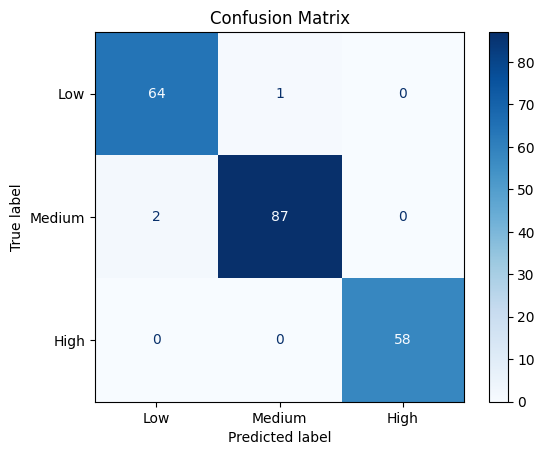

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


To save the model:

In [ ]:
model.save('sleep_quality_classifier.h5')